In [54]:
# importar todas las funciones de pylab
from pylab import *
# importar el módulo pyplot
import matplotlib.pyplot as plt
import numpy as np

In [55]:
from google.colab import files
uploaded = files.upload()

Saving datos4.json to datos4 (2).json


# C) Creación del modelo básico con un atributo.
En este apartado se va a crear un modelo utilizando LinearRegressor de la biblioteca Scikit-learn para predecir la estancia en la que estamos utilizando solamente el RSSI de la red WiFi del punto de acceso WiFi con conexión a Internet de la vivienda. La API de LinearRegressor se encarga de realizar un ajuste del modelo y presenta métodos para realizar el entrenamiento, la evaluación e inferencia del modelo.

La creación del modelo requiere conocer la variable etiqueta (u objetivo) que se desea predecir, en este caso, será la variable *Estancia* y la variable atributo que consiste en una o varias variables de entrada para el modelo de regresión lineal, en este caso, será la variable *RSSI_AP*. **El entrenamiento y evaluación del modelos se realiza con diferente conjunto de datos**.

1.- Instalar el paquete scikit-learn para construir el modelo y separar las etiquetas (AY) de los atributos (AX). En nuestro caso, en la tabla AY se guardarán los datos de la `Estancia`, mientras que en AX se guardarán los valores de `RSSI_AP`:

In [56]:
from sklearn import linear_model
import random
from scipy.special import expit
import pandas as pd


aX = []
aY = []
aX_Baliza0 = []
aY_Baliza0 = []
aX_Baliza1 = []
aY_Baliza1 = []
aX_Baliza2 = []
aY_Baliza2 = []
aX_Baliza3 = []
aY_Baliza3 = []

df = pd.read_json ('datos4.json', lines=True)
print(df)
for _, fila in df.iterrows():
    fila = dict(fila)   

    n_baliza = fila['N-baliza']
    x = fila['coord-x']
    y = fila['coord-y']
    # print(fila)
    for i, baliza in enumerate(fila['balizas']):
        # print(baliza)
        x2 = baliza['pos-x']
        y2 = baliza['pos-y']      
        #distancia = int(20*math.sqrt((x2-x)**2+(y2-y)**2))
        distancia = int(20*math.sqrt((x2-x)**2+(y2-y)**2))
        # print("distancia: ", distancia)
        aX.append(baliza['señal'])
        aY.append(distancia)
        if x2==0 and y2 ==0:
              aX_Baliza0.append(baliza['señal'])
              aY_Baliza0.append(distancia)
        if x2==14 and y2==0:
              aX_Baliza1.append(baliza['señal'])
              aY_Baliza1.append(distancia)
        if x2==14 and y2==14:
              aX_Baliza2.append(baliza['señal'])
              aY_Baliza2.append(distancia)
        if x2==0 and y2==14:
              aX_Baliza3.append(baliza['señal'])
              aY_Baliza3.append(distancia)


     coord-x  ...                                            balizas
0          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
1          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
2          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
3          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
4          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
..       ...  ...                                                ...
220       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
221       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
222       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
223       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
224       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...

[225 rows x 4 columns]


Mostrar una gráfica con los 900 datos.

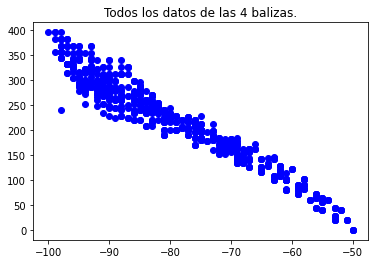

In [57]:

plt.scatter(aX,aY, label='datos',color='blue')
plt.title('Todos los datos de las 4 balizas.');

Mostrar una gráfica con los datos de la baliza 0 (superior izquierda, es decir, 
coordenadas 0,0)

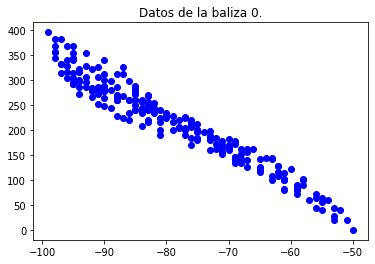

In [58]:
plt.scatter(aX_Baliza0,aY_Baliza0, label='datos',color='blue')
plt.title('Datos de la baliza 0.');


Mostrar una gráfica con los datos de la baliza 1 (superior derecha, es decir, 
coordenadas 14,0))

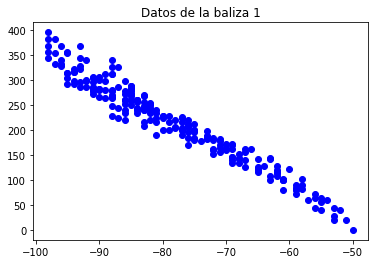

In [59]:
plt.scatter(aX_Baliza1,aY_Baliza1, label='datos',color='blue')
plt.title('Datos de la baliza 1');


Mostrar una gráfica con los datos de la baliza 2 (inferior derecha, es decir, 
coordenadas 14,14))

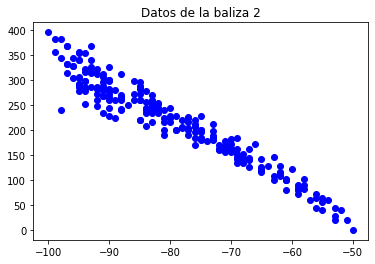

In [60]:
plt.scatter(aX_Baliza2,aY_Baliza2, label='datos',color='blue')
plt.title('Datos de la baliza 2');


Mostrar una gráfica con los datos de la baliza 3 (inferior izquierda, es decir, 
coordenadas 0,14))

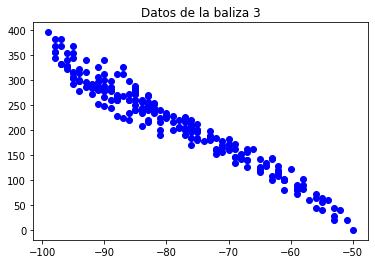

In [61]:
plt.scatter(aX_Baliza3,aY_Baliza3, label='datos',color='blue')
plt.title('Datos de la baliza 3');

2.- Crear un data frame con las etiquetas (parámetro que se desea predecir) y  otro data frame con el resto de datos:

In [62]:
X = pd.DataFrame(data=aX,columns=["RSSI"])
Y = pd.DataFrame(data=aY,columns=["DISTANCIA"])
display(Y)
display(X)
X0 = pd.DataFrame(data=aX_Baliza0,columns=["RSSI"])
Y0 = pd.DataFrame(data=aY_Baliza0,columns=["DISTANCIA"])
X1 = pd.DataFrame(data=aX_Baliza1,columns=["RSSI"])
Y1 = pd.DataFrame(data=aY_Baliza1,columns=["DISTANCIA"])
X2 = pd.DataFrame(data=aX_Baliza2,columns=["RSSI"])
Y2 = pd.DataFrame(data=aY_Baliza2,columns=["DISTANCIA"])
X3 = pd.DataFrame(data=aX_Baliza3,columns=["RSSI"])
Y3 = pd.DataFrame(data=aY_Baliza3,columns=["DISTANCIA"])


,DISTANCIA
0,0
1,280
2,395
3,280
4,20
...,...
895,280
896,395
897,280
898,0


,RSSI
0,-50
1,-89
2,-100
3,-90
4,-53
...,...
895,-90
896,-99
897,-90
898,-50


3.- Dividir todos los registros de la base de datos en dos bases de datos:
*   Entrenamiento: una base de datos con el 75 % de los datos para entrenar el modelo.
*   Test: otra base de datos con el 25 % de datos para testear el modelo.

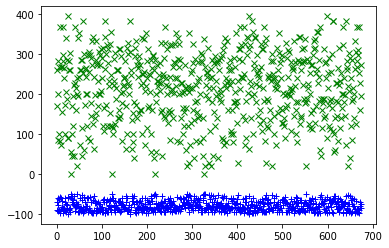

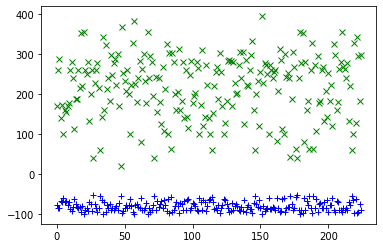

In [63]:
from sklearn.model_selection import train_test_split
coef_separacion = 0.25
entrenar_X, test_X, entrenar_Y, test_Y = train_test_split(X.values.reshape(-1,1),Y.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X0, test_X0, entrenar_Y0, test_Y0 = train_test_split(X0.values.reshape(-1,1),Y0.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X1, test_X1, entrenar_Y1, test_Y1 = train_test_split(X1.values.reshape(-1,1),Y1.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X2, test_X2, entrenar_Y2, test_Y2 = train_test_split(X2.values.reshape(-1,1),Y2.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X3, test_X3, entrenar_Y3, test_Y3 = train_test_split(X3.values.reshape(-1,1),Y3.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
plot(entrenar_X,'b+', entrenar_Y,'gx')
figure(2)
plot(test_X,'b+',test_Y,'gx')

4.- La regresión polinomial es un método para encontrar el polinomio que mejor se adapta a un conjunto de puntos. 

distancia = coef_b + coef_w1 * RSSI + coef_w2 * RSSI^2 + coef_w3 *RSSI^3

donde, coef_w0 será 0.

In [92]:
from sklearn.linear_model import LinearRegression
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X_polinomio = pf.fit_transform(entrenar_X.reshape(-1, 1))  # transformamos la entrada en polinómica

modelo = LinearRegression()
modelo.fit(X_polinomio, entrenar_Y)
# Información del modelo generado
print('Modelo todas las balizas: w= '+str(modelo.coef_)+' , b= '+str(modelo.intercept_))

X0_polinomio = pf.fit_transform(entrenar_X0.reshape(-1, 1))  # transformamos la entrada en polinómica
modelo0 = LinearRegression()
modelo0.fit(X0_polinomio,entrenar_Y0)
# Información del modelo generado
print('Modelo baliza 0: w= '+str(modelo0.coef_)+' , b= '+str(modelo0.intercept_))

X1_polinomio = pf.fit_transform(entrenar_X1.reshape(-1, 1))  # transformamos la entrada en polinómica
modelo1 = LinearRegression()
modelo1.fit(X1_polinomio,entrenar_Y1)
# Información del modelo generado
print('Modelo baliza 1: w= '+str(modelo1.coef_)+' , b= '+str(modelo1.intercept_))

X2_polinomio = pf.fit_transform(entrenar_X2.reshape(-1, 1))  # transformamos la entrada en polinómica
modelo2 = LinearRegression()
modelo2.fit(X2_polinomio,entrenar_Y2)
# Información del modelo generado
print('Modelo baliza 2: w= '+str(modelo2.coef_)+' , b= '+str(modelo2.intercept_))

X3_polinomio = pf.fit_transform(entrenar_X3.reshape(-1, 1))  # transformamos la entrada en polinómica
modelo3 = LinearRegression()
modelo3.fit(X3_polinomio,entrenar_Y3)
# Información del modelo generado
print('Modelo baliza 3: w= '+str(modelo3.coef_)+' , b= '+str(modelo3.intercept_))

Modelo todas las balizas: w= [[ 0.00000000e+00 -4.63944489e+01 -5.27772392e-01 -2.29098348e-03]] , b= [-1284.05855406]
Modelo baliza 0: w= [[ 0.00000000e+00 -4.76691935e+01 -5.48606710e-01 -2.39789342e-03]] , b= [-1306.62706142]
Modelo baliza 1: w= [[ 0.00000000e+00 -3.84625672e+01 -4.25222056e-01 -1.86487072e-03]] , b= [-1084.92921283]
Modelo baliza 2: w= [[ 0.00000000e+00 -4.89140787e+01 -5.60132854e-01 -2.41610033e-03]] , b= [-1344.67757518]
Modelo baliza 3: w= [[ 0.00000000e+00 -5.54589443e+01 -6.53870659e-01 -2.86306354e-03]] , b= [-1495.96021601]


5.- Una vez creado el modelo, se puede evaluar la precisión para lo cual se deben generar las predicciones del 25 % de datos reservados para testear el modelo:

In [103]:
test_X_polinomio = pf.fit_transform(test_X.reshape(-1, 1))  # transformamos la entrada en polinómica
predicciones_Y=modelo.predict(test_X_polinomio)

test_X0_polinomio = pf.fit_transform(test_X0.reshape(-1, 1))
predicciones_Y0=modelo0.predict(test_X0_polinomio)
test_X1_polinomio = pf.fit_transform(test_X1.reshape(-1, 1)) 
predicciones_Y1=modelo1.predict(test_X1_polinomio)
test_X2_polinomio = pf.fit_transform(test_X2.reshape(-1, 1)) 
predicciones_Y2=modelo2.predict(test_X2_polinomio)
test_X3_polinomio = pf.fit_transform(test_X3.reshape(-1, 1)) 
predicciones_Y3=modelo3.predict(test_X3_polinomio)

Mostrar una gráfica con los 900 datos y el modelo total.

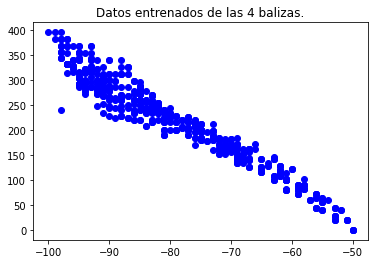

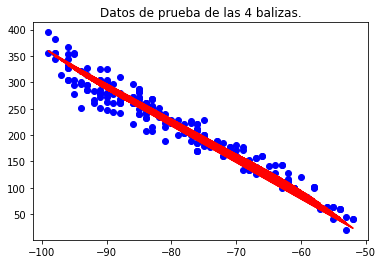

In [104]:
plt.scatter(entrenar_X,entrenar_Y, label='datos',color='blue')
plt.title('Datos entrenados de las 4 balizas.');
figure(2)
plt.scatter(test_X,test_Y, label='datos',color='blue')
plt.plot(test_X, predicciones_Y, linestyle='-', color='red')
plt.title('Datos de prueba de las 4 balizas.');

Mostrar una gráfica con los datos de la baliza 0 (superior izquierda, es decir, 
coordenadas 0,0) y su modelo.

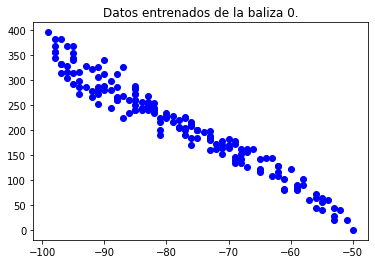

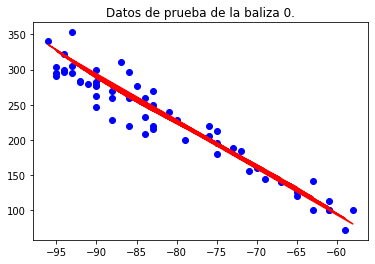

In [105]:
plt.scatter(entrenar_X0,entrenar_Y0, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 0.');
figure(2)
plt.scatter(test_X0,test_Y0, label='datos',color='blue')
plt.plot(test_X0, predicciones_Y0, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 0.');

Mostrar una gráfica con los datos de la baliza 1 (superior derecha, es decir, 
coordenadas 14,0)) y su modelo.

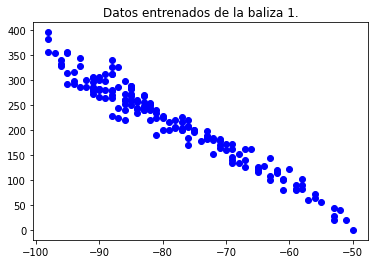

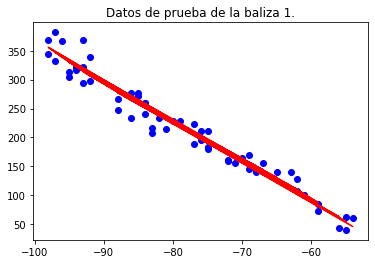

In [106]:
plt.scatter(entrenar_X1,entrenar_Y1, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 1.');
figure(2)
plt.scatter(test_X1,test_Y1, label='datos',color='blue')
plt.plot(test_X1, predicciones_Y1, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 1.');

Mostrar una gráfica con los datos de la baliza 2 (inferior derecha, es decir, 
coordenadas 14,14)) y su modelo.

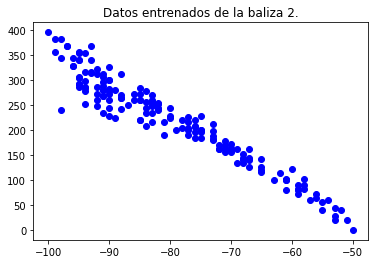

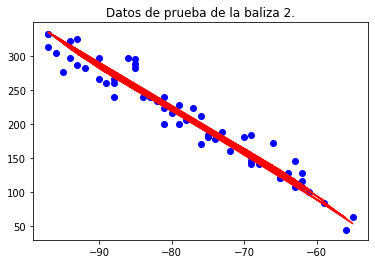

In [107]:
plt.scatter(entrenar_X2,entrenar_Y2, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 2.');
figure(2)
plt.scatter(test_X2,test_Y2, label='datos',color='blue')
plt.plot(test_X2, predicciones_Y2, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 2.');

Mostrar una gráfica con los datos de la baliza 3 (inferior izquierda, es decir, 
coordenadas 0,14)) y su modelo.

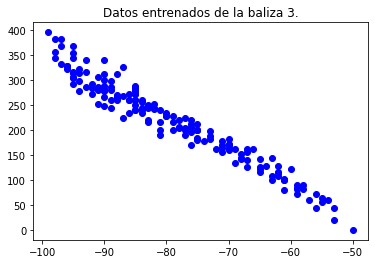

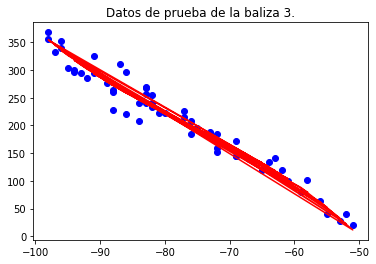

In [108]:
plt.scatter(entrenar_X3,entrenar_Y3, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 3.');
figure(2)
plt.scatter(test_X3,test_Y3, label='datos',color='blue')
plt.plot(test_X3, predicciones_Y3, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 3.');

7.- Calcular la raiz cuadrada del error cuadrático medio para cada modelo:

In [110]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(test_Y, predicciones_Y, squared=False)
print('Error cuadratico medio (RMSE) del modelo total es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y0, predicciones_Y0, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 0 es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y1, predicciones_Y1, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 1 es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y2, predicciones_Y2, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 2 es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y3, predicciones_Y3, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 3 es: '+str(rmse)+ ' cm')

Error cuadratico medio (RMSE) del modelo total es: 18.29346590387886 cm
Error cuadratico medio (RMSE) del modelo baliza 0 es: 20.852749789934904 cm
Error cuadratico medio (RMSE) del modelo baliza 1 es: 17.94985117822276 cm
Error cuadratico medio (RMSE) del modelo baliza 2 es: 18.59802849957824 cm
Error cuadratico medio (RMSE) del modelo baliza 3 es: 18.12681199478502 cm
